In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score
import numpy as np

from keras.backend import clear_session
from tensorflow.keras.models import load_model, save_model

import sys  
import os
os.getcwd()

import json
import pandas as pd

In [58]:
sys.path.insert(1, 'D://Users//Desktop//Detection-and-Mitigation-Web-Attack-in-Hybrid-Cloud-using-ML-DL//Data_preprocessing')

import Data_preprocessing

In [59]:
# Assuming df, features_list, and test_type are defined

X = Data_preprocessing.df[Data_preprocessing.features_list].to_numpy()
y = np.stack(Data_preprocessing.df[Data_preprocessing.test_type])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1765, random_state=42, stratify=y)

# Print the dataset shapes and class distribution
print("Training set shapes:", X_train.shape, y_train.shape)
print("Test set shapes:", X_test.shape, y_test.shape)
counter = Counter(y_train)
print("Class distribution in training set:", counter)

# Convert labels to integers
y_train = np.array([1 if label == "Malware" else 0 for label in y_train])
y_test = np.array([1 if label == "Malware" else 0 for label in y_test])

Training set shapes: (3526, 28) (3526,)
Test set shapes: (756, 28) (756,)
Class distribution in training set: Counter({'Malware': 1864, 'Benign': 1662})


In [60]:
# Define the SVM model using TensorFlow
svm_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1, activation=None)  # No activation for SVM
])

# Compile the model with hinge loss
svm_model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

# Train the model with validation data
model = svm_model.fit(X_train, y_train, epochs=300, batch_size=256, validation_data=(X_test, y_test), verbose=1)


Epoch 1/300
14/14 [==============================] - 1s 26ms/step - loss: 14.5351 - accuracy: 0.4714 - val_loss: 13.2167 - val_accuracy: 0.4709
Epoch 2/300
14/14 [==============================] - 0s 11ms/step - loss: 12.3666 - accuracy: 0.4714 - val_loss: 11.0761 - val_accuracy: 0.4709
Epoch 3/300
14/14 [==============================] - 0s 11ms/step - loss: 10.2157 - accuracy: 0.4714 - val_loss: 8.9259 - val_accuracy: 0.4709
Epoch 4/300
14/14 [==============================] - 0s 10ms/step - loss: 8.0528 - accuracy: 0.4714 - val_loss: 6.7807 - val_accuracy: 0.4709
Epoch 5/300
14/14 [==============================] - 0s 9ms/step - loss: 5.8898 - accuracy: 0.4733 - val_loss: 4.6456 - val_accuracy: 0.4775
Epoch 6/300
14/14 [==============================] - 0s 8ms/step - loss: 3.7500 - accuracy: 0.4762 - val_loss: 2.5350 - val_accuracy: 0.4828
Epoch 7/300
14/14 [==============================] - 0s 7ms/step - loss: 1.7343 - accuracy: 0.4889 - val_loss: 1.0813 - val_accuracy: 0.5079
Epoc

In [61]:
# Evaluate the model
y_pred = svm_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

24/24 [==============================] - 0s 956us/step
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       356
           1       1.00      1.00      1.00       400

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



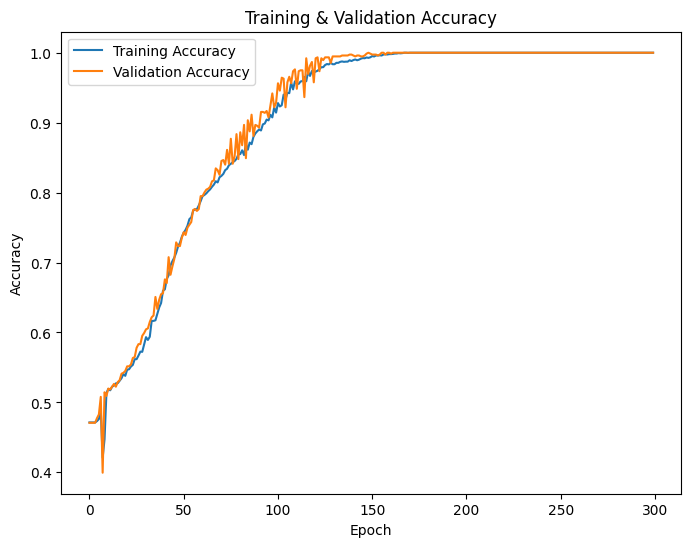

In [62]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(model.history['accuracy'], label='Training Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

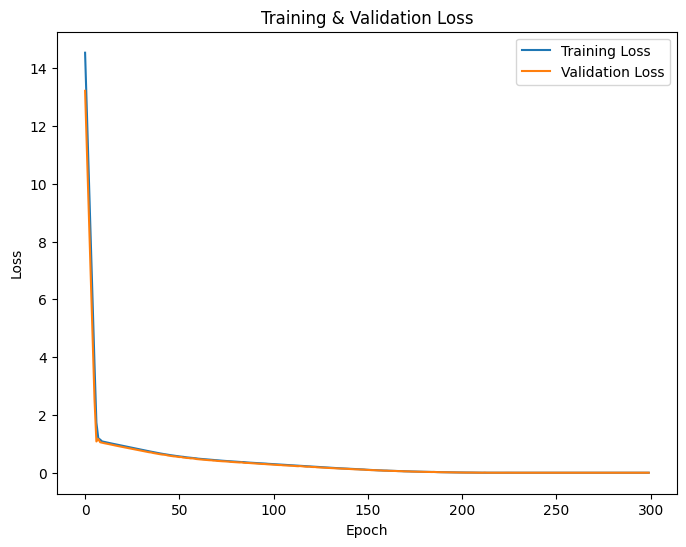

In [63]:
# Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(model.history['loss'], label='Training Loss')
plt.plot(model.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

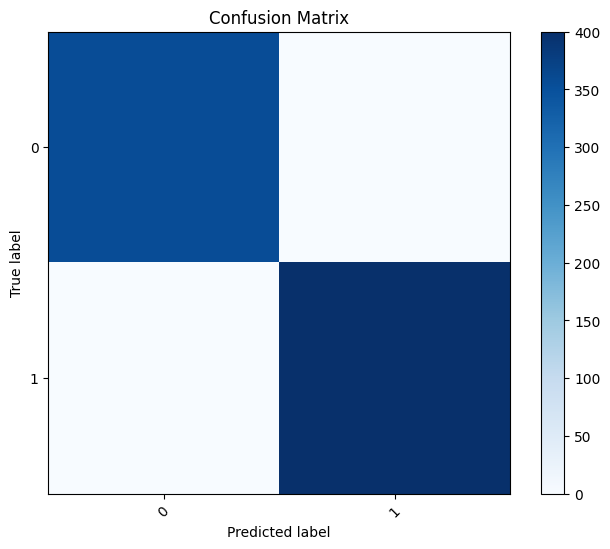

In [64]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = [0, 1]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

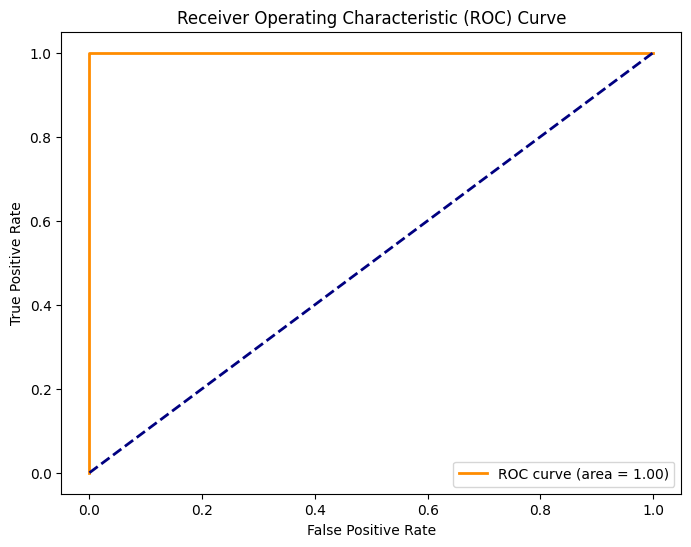

In [65]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [66]:
# Save entire model to a HDF5 file
save_model(svm_model, 'D://Users//Desktop//Detection-and-Mitigation-Web-Attack-in-Hybrid-Cloud-using-ML-DL//Save_models//Svm_binary_classifier.h5')

# Recreate the exact same model, including weights and optimizer.
# new_model = load_model('D://Users//Desktop//Detection-and-Mitigation-Web-Attack-in-Hybrid-Cloud-using-ML-DL//Save_models//Svm_binary_classifier.h5')

In [67]:
import pickle
# saving vectorizer
with open('tfid.pickle','wb') as f:
    pickle.dump(Data_preprocessing.vectorize_df,f)

In [68]:
# saving model
with open('model_api.pickle','wb') as f:
    pickle.dump(svm_model,f)

INFO:tensorflow:Assets written to: ram://07f3982e-4648-4289-a154-f2a540b6d399/assets


In [69]:
# Read the validation json, preprocess it and run your model 
dataset_number = 1  # Replace this with the dataset number you want to use
with open(f'D:/Users/Desktop/Detection-and-Mitigation-Web-Attack-in-Hybrid-Cloud-using-ML-DL/Datasets/dataset_{str(dataset_number)}_train.json') as file:
    raw_ds = json.load(file)
test_df = pd.json_normalize(raw_ds, max_level=2)

# Preprocess the validation dataset, remember that here you don't have the labels
test_df = Data_preprocessing.vectorize_df(test_df)

# Assuming your model is already trained and stored in 'clf'
# Assuming 'features_list' is the list of features used during training
# Make predictions for the first dataset
X = test_df.iloc[1][Data_preprocessing.features_list].values.reshape(1, -1)
prediction = svm_model.predict(X)

print(X)

# Print or inspect the prediction
print("Prediction for the first dataset:", prediction)

# print(raw_ds[1])

KeyError: "['Log4j', 'SQL', 'RCE', 'Directory_Traversal', 'Cookie_Injection', 'Log_Forge', 'XSS'] not in index"

In [73]:
# On these headers we will run a "simple" BOW
SIMPLE_HEADERS = ['request.headers.Accept-Encoding',
                'request.headers.Connection',
                'request.headers.Host',
                'request.headers.Accept',
                'request.method',
                'request.headers.Accept-Language',
                'request.headers.Sec-Fetch-Site',
                'request.headers.Sec-Fetch-Mode',
                'request.headers.Sec-Fetch-Dest',
                'request.headers.Sec-Fetch-User',
                'response.status',
                ]

# On these headers we will run HashingVectorizer
COMPLEX_HEADERS = ['request.headers.User-Agent',
                    'request.headers.Set-Cookie',
                    'request.headers.Date',
                    'request.url',
                    'response.headers.Content-Type',
                    'response.body',
                    'response.headers.Location',
                    'request.headers.Content-Length',
                    'request.headers.Cookie',
                    'response.headers.Set-Cookie'
                    ]

COLUMNS_TO_REMOVE = ['request.body',
                    'response.headers.Content-Length',
                    'request.headers.Date']

In [75]:
import json
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer

test_jsons = [
       {
            "request": {
        "headers": {
            "Host": "127.0.0.1:5000",
            "User-Agent": "Mozilla/5.0 (X11; OpenBSD amd64; rv:28.0) Gecko/20100101 Firefox/28.0",
            "Accept-Encoding": "gzip, deflate, br",
            "Accept": "*/*",
            "Connection": "keep-alive",
            "Accept-Language": "de",
            "Sec-Fetch-Site": "none",
            "Sec-Fetch-Mode": "same-origin",
            "Sec-Fetch-User": "?1",
            "Sec-Fetch-Dest": "document",
            "Set-Cookie": "['ck=UYrrg74Ph7dWrlCA9rgXy6qtYSwxuCZK_nBsCp-j5plCUObLpHiPzL7KqnN-K0mGZAYycI0_Uk7BGfZGA0-oyQ; Domain=localhost:5000; Expires=Wed, 21 Dec 2022 18:12:16 GMT', 'uu=DqzDhoc6Y-3WPtBM1AcVAFbk2dJ_fKxTJIWxoUhMtHtTVbG_XkYaKHJdzlcZcBzAQ60q_V3TR0ryhL3qTzJ_sQ; Domain=localhost:5000; Expires=Tue, 06 Dec 2022 18:12:16 GMT', 'session=82ac9c6f-42ae-46f1-98ec-879a4777f624; Expires=Mon, 21 Nov 2022 18:42:16 GMT']",
            "Date": "Mon, 21 Nov 2022 18:12:16 GMT",
            "Content-Length": None,
            "Cookie": None
        },
        "method": "GET",
        "url": "http://127.0.0.1:5000/categories/check/name/2467",
        "body": "",
        "Attack_Tag": None
    },
    "response": {
        "status": "404 NOT FOUND",
        "headers": {
            "Content-Type": "application/json",
            "Content-Length": "41",
            "Location": None,
            "Set-Cookie": ""
        },
        "status_code": 404,
        "body": "{\"error\": \"Category name not found\"}"
    }
       }
] 
input_df = pd.json_normalize(test_jsons, max_level=2)
# input_df.head()

print(input_df.isna())

# Fill the black attack tag lines with "Benign" string
input_df['request.Attack_Tag'] = input_df['request.Attack_Tag'].fillna('Benign')
input_df['attack_type'] = input_df['request.Attack_Tag']

# This function will be used in the lambda below to iterate over the label columns 
# You can use this snippet to run your own lambda on any data with the apply() method
def categorize(row):  
    if row['request.Attack_Tag'] == 'Benign':
        return 'Benign'
    return 'Malware'

input_df['label'] = input_df.apply(lambda row: categorize(row), axis=1)

# After finishing the arrangements we delete the irrelevant column
input_df.drop('request.Attack_Tag', axis=1, inplace=True)

for column in input_df.columns[input_df.isna().any()].tolist():
    # input_df.drop(column, axis=1, inplace=True)
    input_df[column] = input_df[column].fillna('None')

# print(input_df)


def vectorize_df(input_df):
    le = LabelEncoder()
    h_vec = HashingVectorizer(n_features=4)

    # Run LabelEncoder on the chosen features
    for column in SIMPLE_HEADERS: 
        input_df[column] = input_df[column].astype(str)  # Ensure all values are strings
        input_df[column] = le.fit_transform(input_df[column])
    
    # Run HashingVectorizer on the chosen features
    for column in COMPLEX_HEADERS: 
        input_df[column] = input_df[column].astype(str)  # Ensure all values are strings
        input_df[column] = input_df[column].replace(np.nan, '')  # Replace NaN with an empty string
        newHVec = h_vec.fit_transform(input_df[column])
        input_df[column] = newHVec.todense()

    # Remove some columns that may be needed.. (Or not, you decide)
    for column in COLUMNS_TO_REMOVE: 
        input_df.drop(column, axis=1, inplace=True)
    return input_df

input_df = vectorize_df(input_df)

features_list = input_df.columns.to_list()
features_list.remove('label')
features_list.remove('attack_type')

# input_df = input_df[features_list]

# Assuming 'vectorize_df' is the function for preprocessing
# Make sure it's defined before calling it
# input_df = vectorize_df(input_df)

print(input_df)

# Assuming 'features_list' is the list of features used during training
# Make predictions for the input dataset
X_input = input_df.iloc[0][features_list].values.reshape(1, -1)
prediction_input = svm_model.predict(X_input)

print(X_input)

# Print or inspect the prediction for the input dataset
print("Prediction for the input dataset:", prediction_input)


   request.headers.Host  request.headers.User-Agent  \
0                 False                       False   

   request.headers.Accept-Encoding  request.headers.Accept  \
0                            False                   False   

   request.headers.Connection  request.headers.Accept-Language  \
0                       False                            False   

   request.headers.Sec-Fetch-Site  request.headers.Sec-Fetch-Mode  \
0                           False                           False   

   request.headers.Sec-Fetch-User  request.headers.Sec-Fetch-Dest  \
0                           False                           False   

   request.headers.Set-Cookie  request.headers.Date  \
0                       False                 False   

   request.headers.Content-Length  request.headers.Cookie  request.method  \
0                            True                    True           False   

   request.url  request.body  request.Attack_Tag  response.status  \
0        False    

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.int32).